## Recommendation
One objective of Project_color is to recommend color schemes for a given color using the popular palette created with VanGogh data

In [1]:
import os
import numpy as np
import pandas as pd
from cleaning_data import datacleaner # User-defined funtion
import cv2
import matplotlib.pyplot as plt 


In [2]:
path = os.getcwd()
file = os.path.join('/'.join(path.split('/')[:-1]),'Color_Identification','VanGogh_palette.txt')

rgb = datacleaner(file)

In [3]:
def LABdistance(rgb1,rgb2):
    """
    Euclidean distance in LAB space
    """
    c1 = cv2.cvtColor(np.uint8([[rgb1.tolist()]]), cv2.COLOR_RGB2LAB)[0][0]
    c2 = cv2.cvtColor(np.uint8([[rgb2.tolist()]]), cv2.COLOR_RGB2LAB)[0][0]
    d = sum((rgb1-rgb2)**2)**0.5
    return d

Given a random color (in RGB code), the most intuitive way to recommend matching colors would be to find the most similar color in the VanGogh dataset and locate its palette. The limitation of this method is that only one input color is allowed.

In [4]:
def cloest_color(rgb,palette):
    """
    This function calcualte the LAB distatnce between the given rgb code and all 
    the colors stored in the VanGogh palette dataset.
    """

    c = np.array(rgb)   #convert list input into array
    d = []
    for i in range(len(palette)):
        for j in range(5):
            d.append(LABdistance(c,palette[i][j]))
    
    d =np.array(d).reshape(len(palette),5)
    return d

To validate the *cloest_color* function, the yellow color, RGB:(255,255,0), is used as an example. The result showed the cloest color is RGB:(237,223,54).

(-0.5, 0.5, 1.5, -0.5)

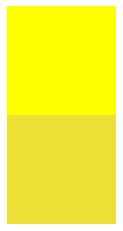

In [5]:
d = cloest_color([255,255,0],rgb)
np.where(d == np.amin(d)) #get the index of the cloest color, eg 166,2
rgb[166][2] #get the rgb code for the cloest color using the index
plt.imshow(np.array([[(255,255,0)],[(237,223,54)]]))
plt.axis('off')

The next step is to return the matching color using the palette corresponds to the cloest color. This is quite simple, and can be achieved with the index.

In [6]:
def recom_res(color,rgb):
    d = cloest_color(color,rgb)
    index = np.where(d == np.amin(d))
    (i,j) = (int(index[0]),int(index[1]))
    palette = rgb[i]
    res = [[tuple(palette[c].tolist())] for c in range(5) if c != j]
    plt.imshow(np.array(res).astype(int))
    plt.axis('off')


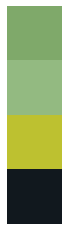

In [7]:
### Recommended results for yellow color
recom_res([255,255,0],rgb)